### 1-problem Definition and understanding
#####  Analyze the dataset and segment customers based on relevant parameters like Gender ,Age, or any other criteria you find important.

##### 1-1 Ask_questions

- Explore distribution of data to check outlier

-Show distribution of Gender

-explore type of Gender with Age

-explore which typr of gender get high Annual Income

-explore relation between Annual_Income with Spending_score

-segment gender according to age with Annual_Income and Spending_score

#### 2-Data_Understanding

CustomerID: Unique ID assigned to the customer

Annual Income (k$): Annual Income of the customee


Gender: Gender of the customer

Age: Age of the customer

Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature

####3- Data_Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
#to show all columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
#check type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#check duplicated values
df.duplicated().all()

False

In [9]:
df.describe(include="all").style.background_gradient(axis=None, cmap='coolwarm')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,nan,2,nan,nan,nan
top,nan,Female,nan,nan,nan
freq,nan,112,nan,nan,nan
mean,100.500000,nan,38.850000,60.560000,50.200000
std,57.879185,nan,13.969007,26.264721,25.823522
min,1.000000,nan,18.000000,15.000000,1.000000
25%,50.750000,nan,28.750000,41.500000,34.750000
50%,100.500000,nan,36.000000,61.500000,50.000000
75%,150.250000,nan,49.000000,78.000000,73.000000


In [10]:
#check missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 4-Expaltory Data Analyst (EDA)

In [11]:
# shown the number of unique values in categorical data
for feature in df.columns:
    print(feature,':',df[feature].nunique())

CustomerID : 200
Gender : 2
Age : 51
Annual Income (k$) : 64
Spending Score (1-100) : 84


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

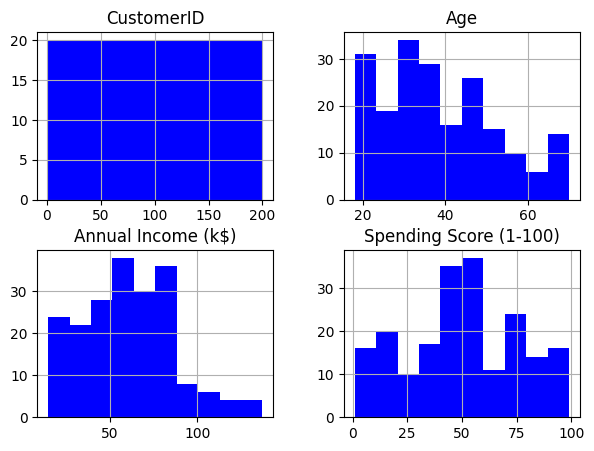

In [12]:
#check distribution of data
df.hist(figsize=(7,5),color='blue')

In [13]:
pie=df['Gender'].value_counts()

([<matplotlib.patches.Wedge at 0x7b8047ff0370>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

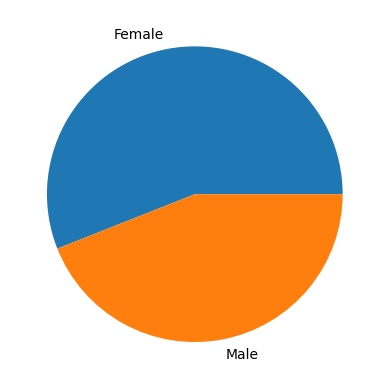

In [14]:
plt.pie(pie,labels=['Female','Male'])

In [15]:
#delet ID column
del_col=df.drop('CustomerID',axis=1,inplace=True)

In [16]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Axes: xlabel='Gender', ylabel='Age'>

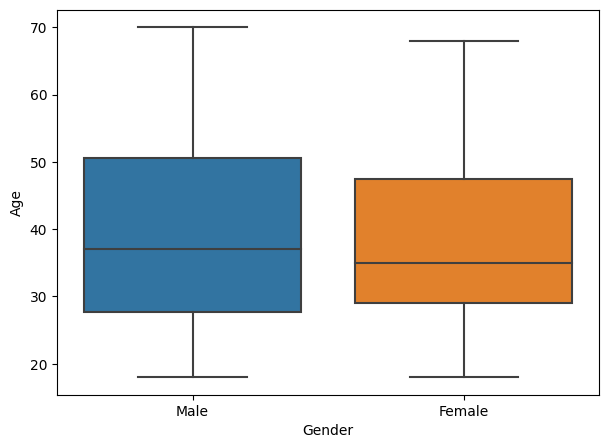

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(y='Age',x='Gender',data=df)

In [18]:
max_income=df.groupby(['Gender']).max()['Annual Income (k$)']

In [19]:
max_income.head()

Gender
Female    126
Male      137
Name: Annual Income (k$), dtype: int64

In [20]:
min_income=df.groupby(['Gender']).min()['Annual Income (k$)']

In [21]:
min_income.head()

Gender
Female    16
Male      15
Name: Annual Income (k$), dtype: int64

In [22]:
max_score=df.groupby(['Gender']).max()['Spending Score (1-100)']

In [23]:
max_score.head()

Gender
Female    99
Male      97
Name: Spending Score (1-100), dtype: int64

In [24]:
min_score=df.groupby(['Gender']).min()['Spending Score (1-100)']


In [25]:
min_score.head()

Gender
Female    5
Male      1
Name: Spending Score (1-100), dtype: int64

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

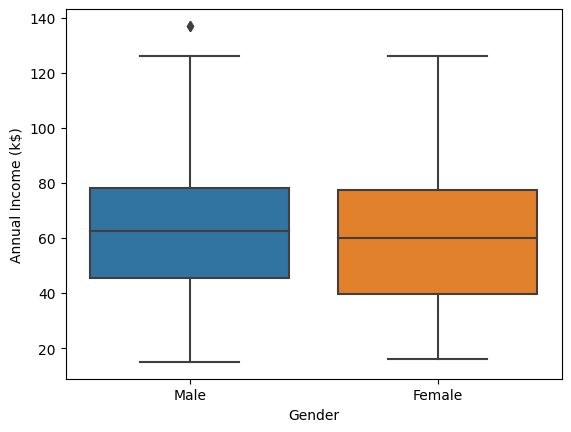

In [26]:
sns.boxplot(y='Annual Income (k$)', x='Gender', data=df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

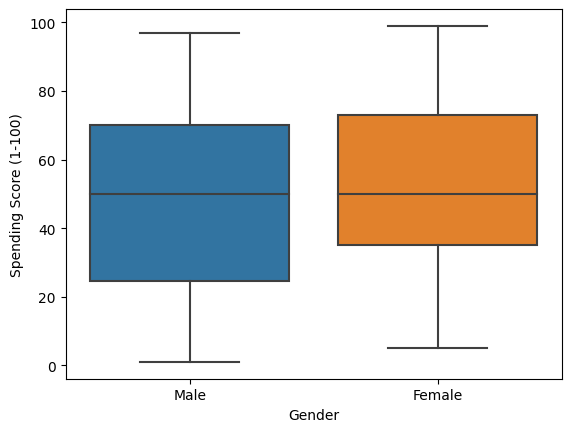

In [27]:
sns.boxplot(y='Spending Score (1-100)', x='Gender', data=df)

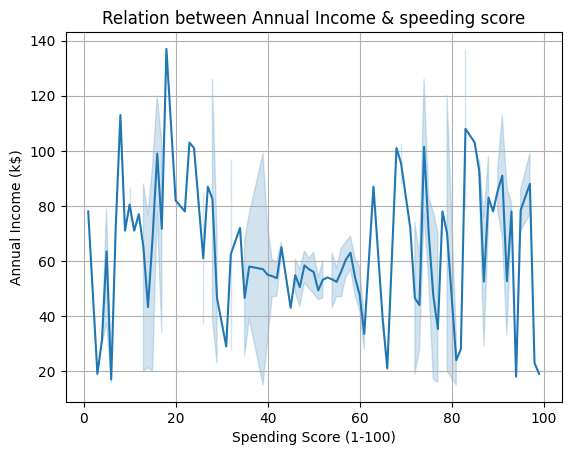

In [42]:
sns.lineplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=df)
plt.title('Relation between Annual Income & speeding score')
plt.grid(True)

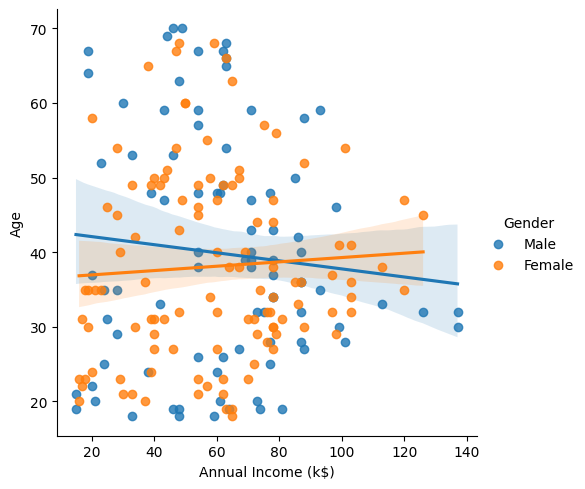

In [52]:
sns.lmplot(x='Annual Income (k$)',y='Age',hue='Gender',data=df)

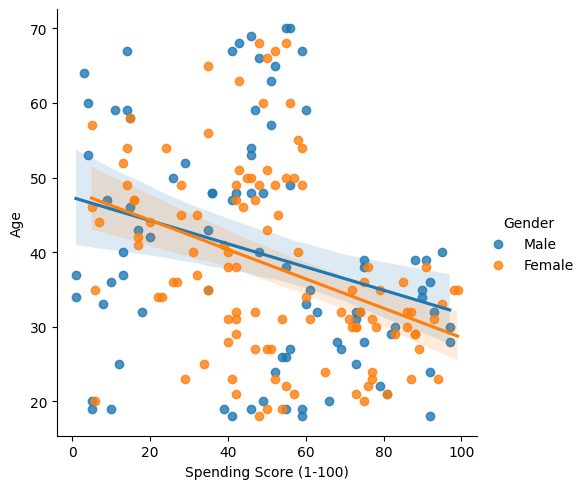

In [51]:
sns.lmplot(x='Spending Score (1-100)',y='Age',hue='Gender',data=df)


<ipython-input-29-a1ed8be94593>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()


<Axes: >

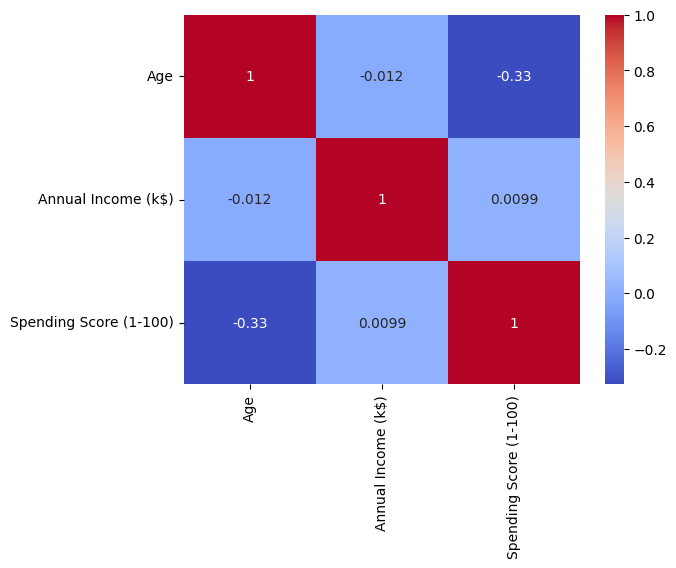

In [29]:
#check multicordinality by correlation of number columns
corr_num=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_num, annot=True, cmap='coolwarm')